<a href="https://colab.research.google.com/github/marcosbaccin/IA_de_consulta_textual_em_SQL/blob/main/IA_de_consulta_textual_em_SQL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# IA para realizar consultas em Bancos de Dados por meio de comandos textuais


# Instalando e Importando a Biblioteca Python - Vanna

In [2]:
%pip install vanna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.9/48.9 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 6.9 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.


In [3]:
import vanna
from vanna.remote import VannaDefault

# Logar no Vanna
O Vanna oferece uma função para obter uma chave de API. Você receberá um código enviado para o seu e-mail.
Você pode salvar sua chave de API para uso futuro, assim você não precisará fazer login todas as vezes.

In [4]:
api_key = vanna.get_api_key('seuEmail@gmail.com')

Check your email for the code and enter it here: 0OCRCV


# Base de Dados
`chinook` é amplamente utilizada para ensino e demonstrações em gestão de banco de dados, consultas SQL e modelagem de dados. Ela representa uma loja de mídia digital, incluindo tabelas para artistas, álbuns, faixas de mídia, faturas e clientes, semelhante a uma loja iTunes do mundo real [Chinook database](https://www.sqlitetutorial.net/sqlite-sample-database/)

In [5]:
vanna_model_name = 'chinook'
vn = VannaDefault(model=vanna_model_name, api_key=api_key)

# Conectando na Base de Dados
Aqui estamos nos conectando a um banco de dados SQLite, mas você pode se conectar **a qualquer** banco de dados SQL

In [6]:
vn.connect_to_sqlite('https://vanna.ai/Chinook.sqlite')

# Vamos Fazer A Mágica Acontecer
Agora vamos usar vn.ask para fazer perguntas e isso irá gerar SQL, executar o SQL, mostrar a tabela e gerar um gráfico.

SELECT a.ArtistId, a.Name, SUM(il.Quantity) AS TotalSales
FROM Artist a
JOIN Album al ON a.ArtistId = al.ArtistId
JOIN Track t ON al.AlbumId = t.AlbumId
JOIN InvoiceLine il ON t.TrackId = il.TrackId
GROUP BY a.ArtistId, a.Name
ORDER BY TotalSales DESC
LIMIT 3;
   ArtistId         Name  TotalSales
0        90  Iron Maiden         140
1       150           U2         107
2        50    Metallica          91


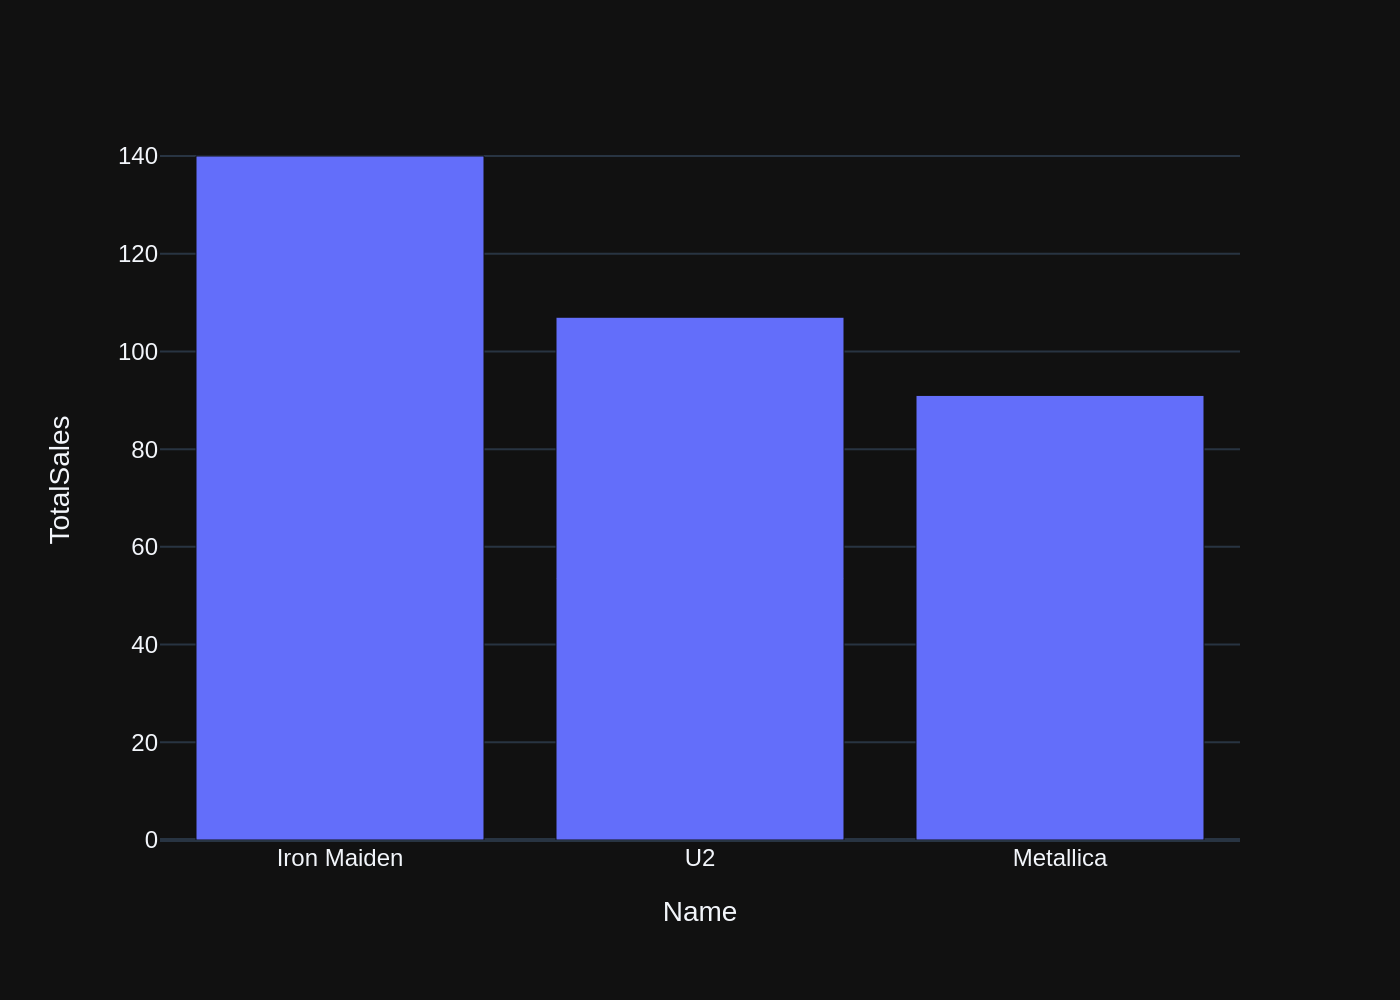

In [7]:
vn.ask("Quais são os TOP 3 artistas mais vendidos")

SELECT SUM(Total) AS TotalFaturado
FROM Invoice;
   TotalFaturado
0         2328.6


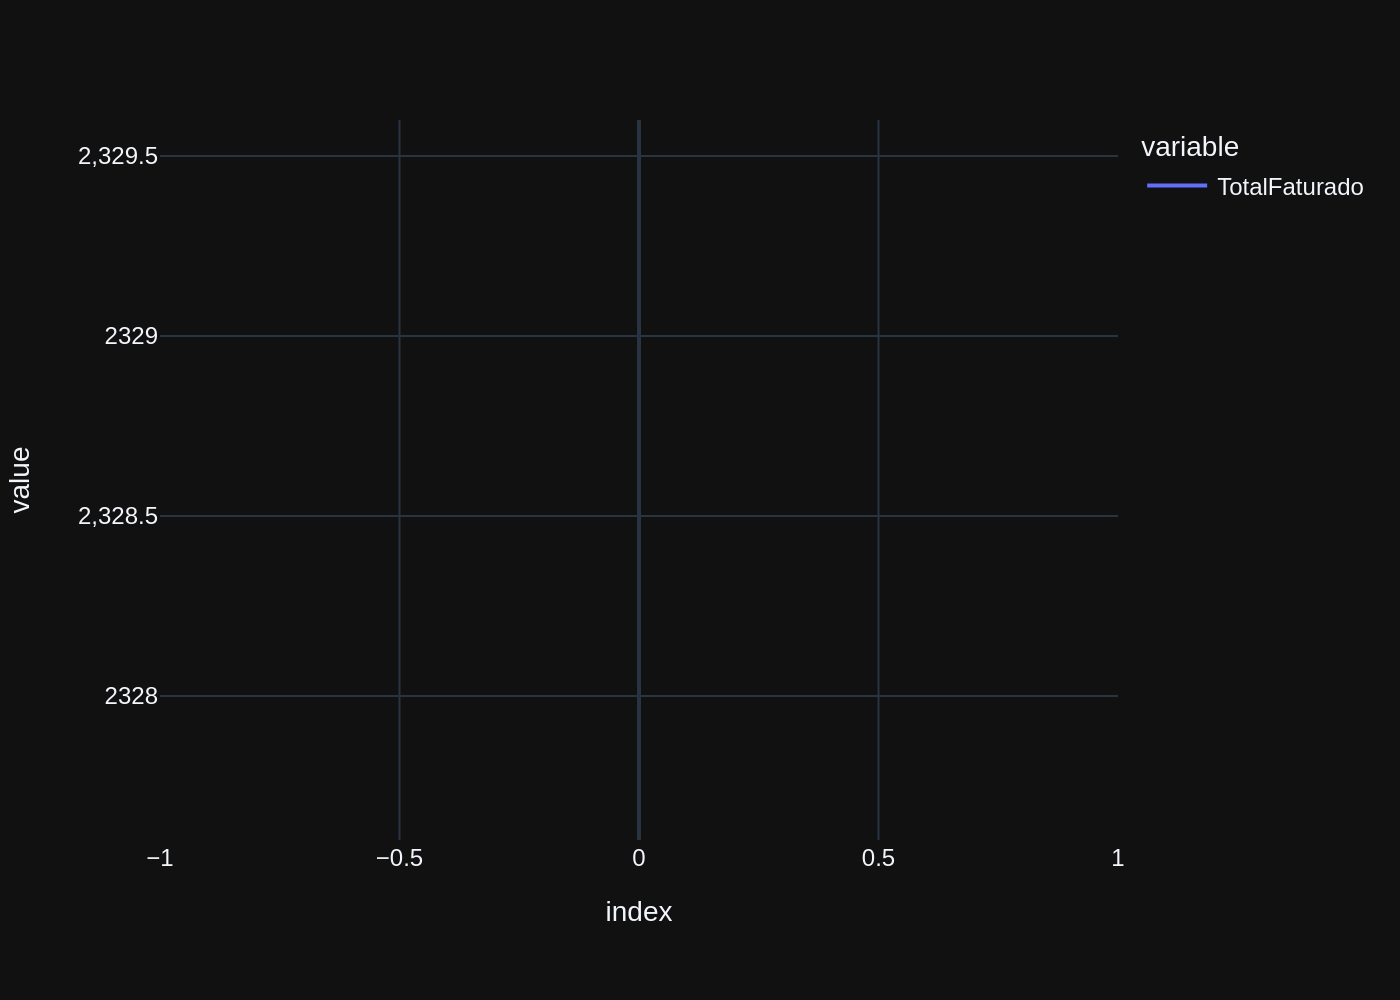

In [8]:
vn.ask("Qual o total faturado com as vendas ?")

# Agora de acordo com as tabelas abaixo, faça uma nova pergunta

Para referência, estas são as tabelas no banco de dados.

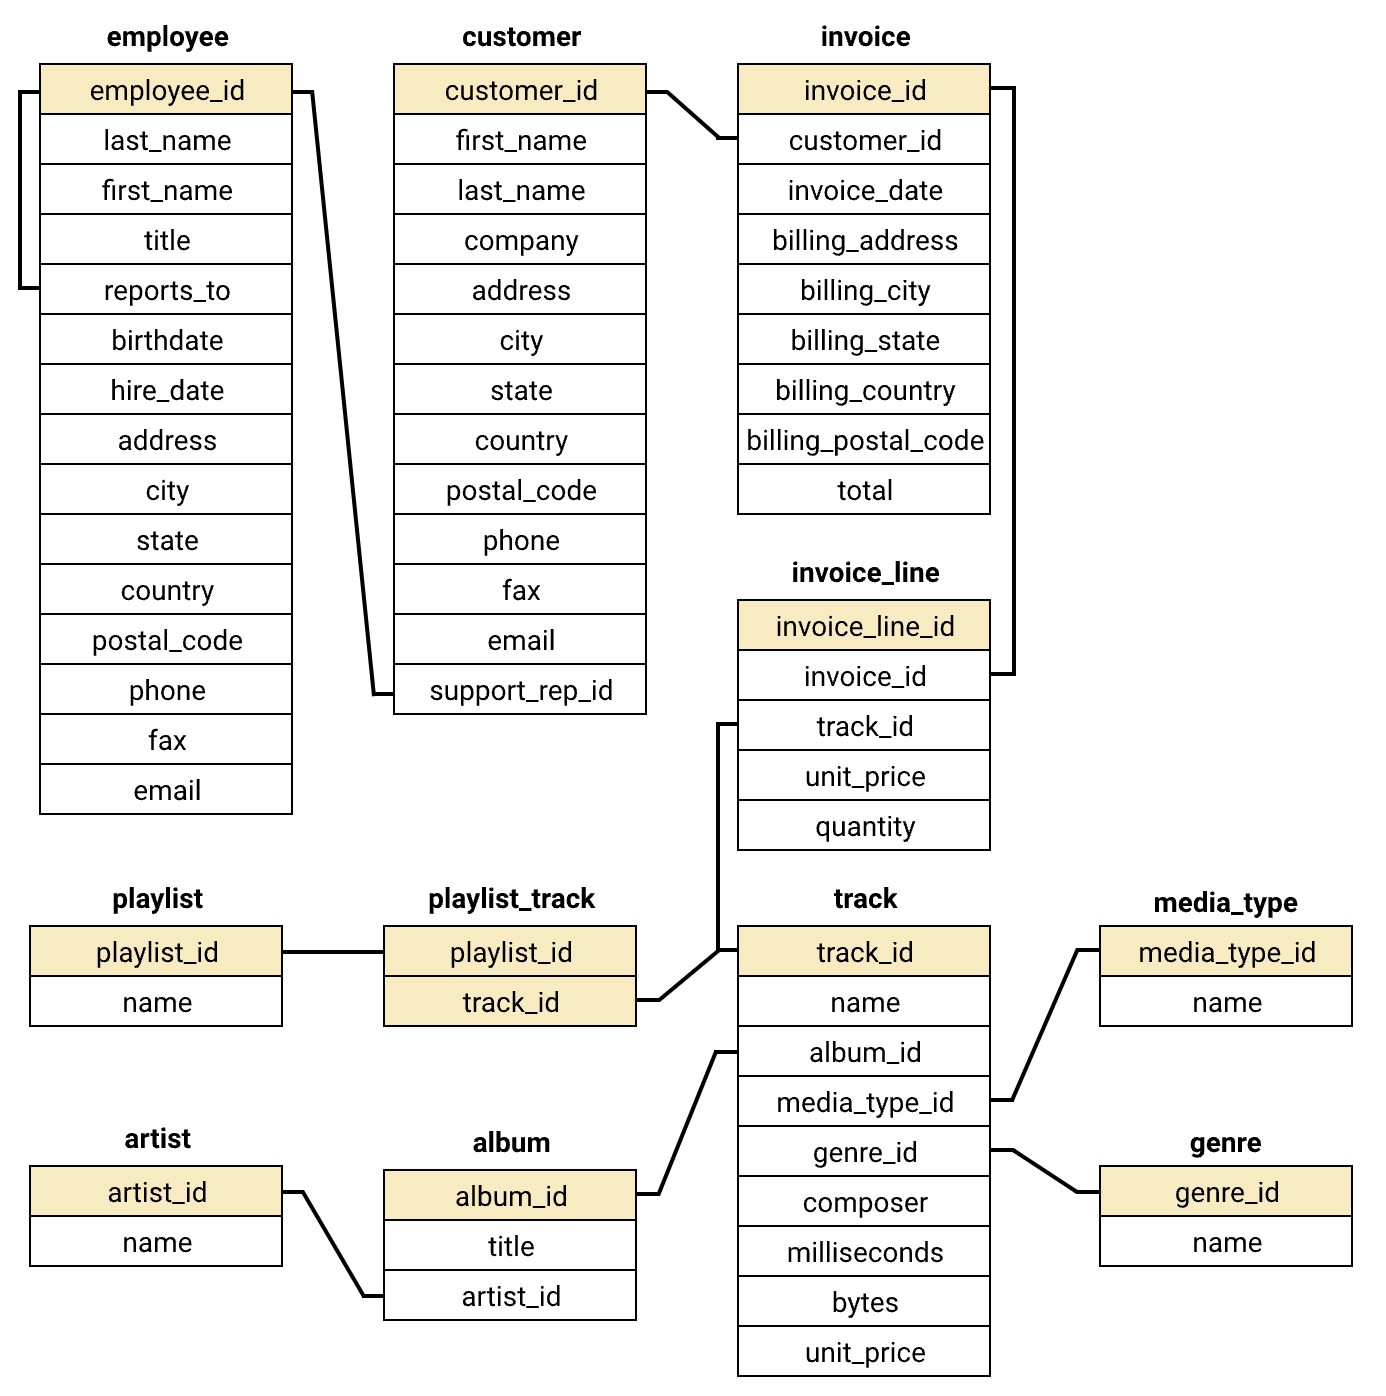

SELECT a.Name AS Band, COUNT(*) AS TotalTracks
FROM Artist a
JOIN Album al ON a.ArtistId = al.ArtistId
JOIN Track t ON al.AlbumId = t.AlbumId
JOIN Genre g ON t.GenreId = g.GenreId
WHERE g.Name = 'Rock'
GROUP BY a.Name
ORDER BY TotalTracks DESC
LIMIT 5;
           Band  TotalTracks
0  Led Zeppelin          114
1            U2          112
2   Deep Purple           92
3   Iron Maiden           81
4     Pearl Jam           54


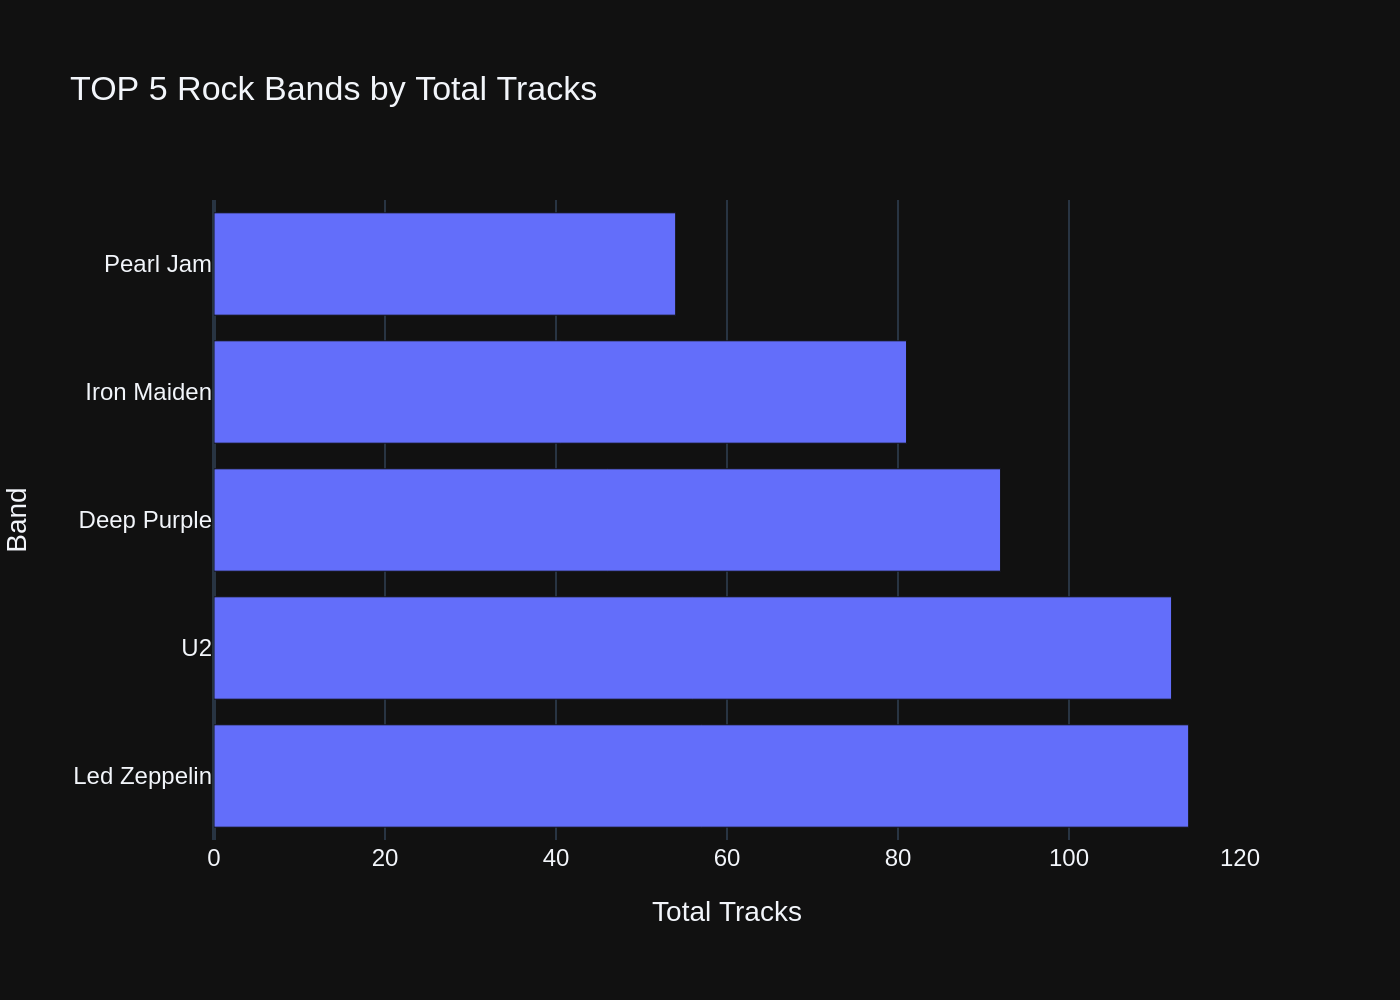

In [11]:
vn.ask("Qual é o TOP 5 bandas de Rock mais ouvidas?")

## Aplicação WEB com Flask Python

In [12]:
from vanna.flask import VannaFlaskApp
app = VannaFlaskApp(vn)
app.run()

<IPython.core.display.Javascript object>

Your app is running at:
https://k3tijh1w1qo-496ff2e9c6d22116-8084-colab.googleusercontent.com/
 * Serving Flask app 'vanna.flask'
 * Debug mode: off
